# Lei de Fourier:
$$\vec{q} = -k \frac{dT}{dx}$$

### Equação de calor:
$$\frac{\partial T}{\partial t} = \nabla^2 T$$

### Em uma dimensão:
$$\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2}$$

### Diferenças finitas:
$$\frac{T(x, t+1) }{k} = \frac{T(x+1, t) - 2T(x, t) + T(x-1, t)}{h^2}$$

![SVG](./Explicit_method-stencil.svg)

### Isolando T(x, t+1):
$$T(x, t+1) = \frac{k}{h^2}\left(T(x+1, t) - 2T(x, t) + T(x-1, t)\right) - T(x, t)$$

In [89]:
import numpy, scipy
from matplotlib import pyplot

numpy.set_printoptions(precision=3)

Comprimento do domínio físico e sua quantidade de pontos

In [90]:
L = 1
nb_points = 50
h = float(L)/float(nb_points-1)
x_grid = [j*h for j in range(nb_points)]

Distância temporal entre cada ponto da solução atual e futura

In [91]:
k = 0.0001

In [92]:
r = k/(h*h)

Condição inicial:

In [93]:
T = [numpy.sin(5*j) for j in x_grid]

Gráfico da condinção inicial:

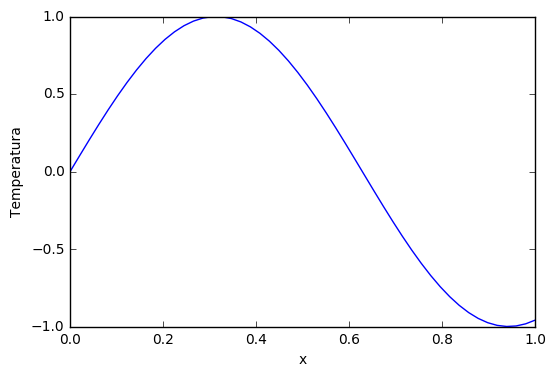

In [94]:
pyplot.ylim((-1, 1))
pyplot.xlabel('x')
pyplot.ylabel('Temperatura')
pyplot.plot(x_grid, T)
pyplot.show()

Mantendo as bordas (x=0 e x=1) a temperatura constante, partimos para a solução do sistema.

In [95]:
from matplotlib import animation, rc
from IPython.display import HTML

In [96]:
fig, ax = pyplot.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

In [97]:
def nextStep():
    global T
    T = [T[0]] + [(1-2*r)*Tj + r*T[i-1] + r*T[i+1] for i, Tj in enumerate(T) if (nb_points-1) > i > 0] + [T[nb_points-1]]

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    global T
    nextStep()
    line.set_data(x_grid, T)
    return (line,)

In [84]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=10, blit=True)

HTML(anim.to_html5_video())

Resultado final (depois de mais 1500 iterações):

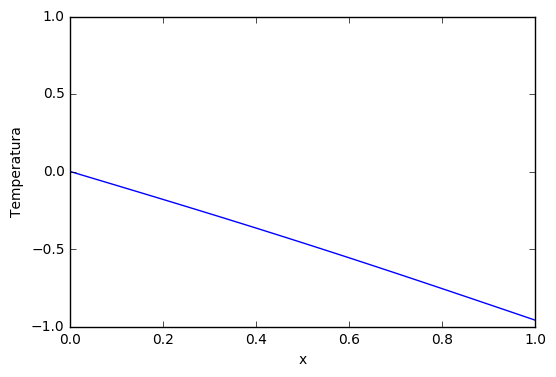

In [87]:
timesteps = 1500
while(timesteps > 0):
    nextStep()
    timesteps = timesteps - 1

pyplot.ylim((-1, 1))
pyplot.xlabel('x')
pyplot.ylabel('Temperatura')
pyplot.plot(x_grid, T)
pyplot.show()